# Audio data post-processing using Python

In this Jupyter Notebook, audio data obtained from the RAVDESS Emotional Speech Audio database. These files are speech audio-only files (16bit, 48kHz .wav) from the RAVDESS database.

In [7]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob # allows to read files from a directory
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [18]:
# Set some shortcuts
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [19]:
# Read the audio files
audio_files = glob('data/ravdess_emotional_speech_dataset/*/*.wav')

In [37]:
# Play a sample audio file from the list
ipd.Audio(audio_files[0])

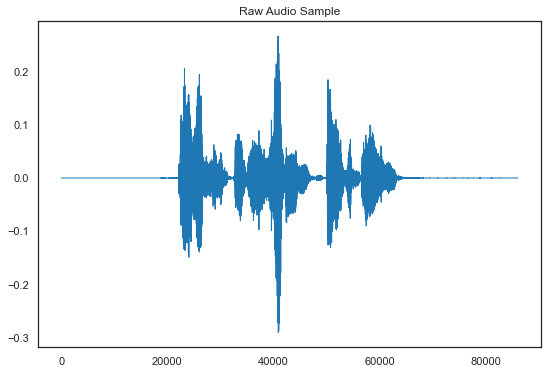

In [76]:
# Extract the audio time series and their corresponding sample rates
y, sr = librosa.load(audio_files[0])
pd.Series(y).plot(figsize=(9, 6), lw=1, title='Raw Audio Sample')
plt.show()

## Zoomed view of the raw audio signal

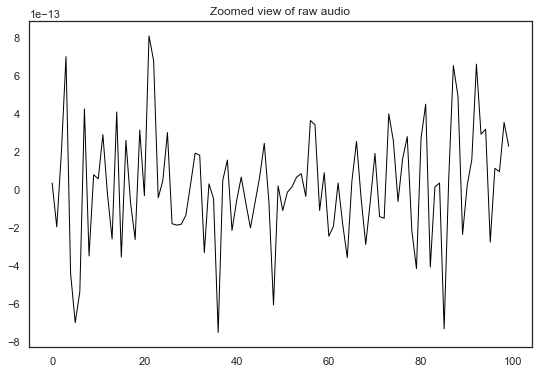

In [88]:
pd.Series(y[10400:10500]).plot(figsize=(9, 6), lw=1, title='Zoomed view of raw audio', color='black')
# pd.Series(y_trimmed[10000:10500]).plot(figsize=(9, 6), lw=1, title='Zoomed view of raw audio', color='red')
plt.show()

## Trimming the leading & trailing silence from raw data

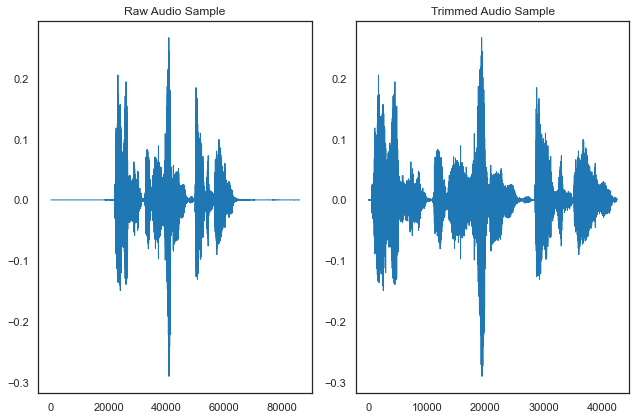

In [111]:
# Trimming the leading & trailing silence in the audio
y_trimmed, _ = librosa.effects.trim(y, top_db=25)
# print(librosa.get_duration(y), librosa.get_duration(y_trimmed))
plt.subplot(1, 2, 1)
pd.Series(y).plot(figsize=(9, 6), lw=1, title='Raw Audio Sample')
plt.tight_layout()
plt.subplot(1, 2, 2)
pd.Series(y_trimmed).plot(figsize=(9, 6), lw=1, title='Trimmed Audio Sample')
plt.tight_layout()
plt.show()

## Spectrogram
Now, we extract the location of each frequency in the raw audio data using the Fourier transform. To that end, we are utilizing the Short-time Fourier transform function of librosa library. The rationale for doing this transformation is to obtain a usable data in decibels which can be fed to a Machine Learning (ML) model in the upcoming projects.

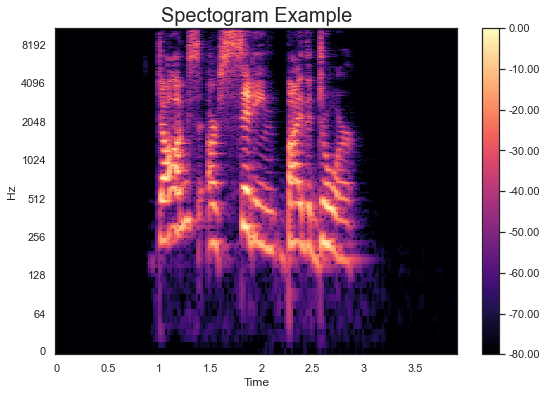

In [113]:
# Perform Short-time Fourier transform (stft)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # sound or audio in decibel format

# Plot the Spectrogram of the audio in Hertz
fig, ax = plt.subplots(figsize=(9, 6))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Melodic spectrogram or Mel spectrogram
In this subsection, we are going to plot the spectrogram in melodic scale to express the frequencies which we can hear in audio.

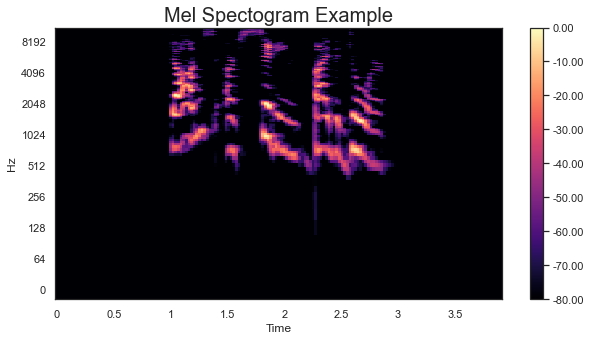

In [115]:
# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()